# Solar Power Generation Data
Solar power generation and sensor data for two power plants. To do:

1. Can we predict the power generation for next couple of days? - this allows for better grid management
2. Can we identify the need for panel cleaning/maintenance?
3. Can we identify faulty or suboptimally performing equipment?

In [1]:
import numpy as np
import pandas as pd

power_data = pd.read_csv('data//Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('data//Plant_1_Weather_Sensor_Data.csv')
power_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [2]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


## Data Exploration

#### Generation Data

In [3]:
power_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


First, let's change Date_Time to correct dtype

In [4]:
power_data = power_data.astype({'DATE_TIME': 'datetime64'})

In [5]:
power_data.describe(include='object')

,SOURCE_KEY
count,68778
unique,22
top,bvBOhCH3iADSZry
freq,3155


There are 22 power sources in the power plant. Lets check the outputs of each

#### Total DC output

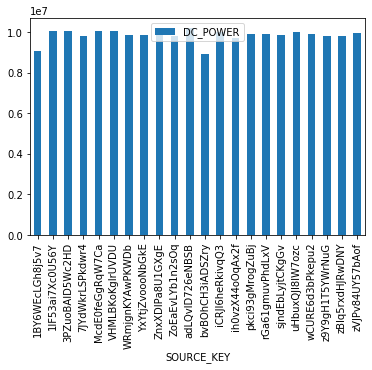

In [6]:
power_data[['SOURCE_KEY','DC_POWER']].groupby(['SOURCE_KEY']).sum().plot(kind='bar')

#### Total AC output

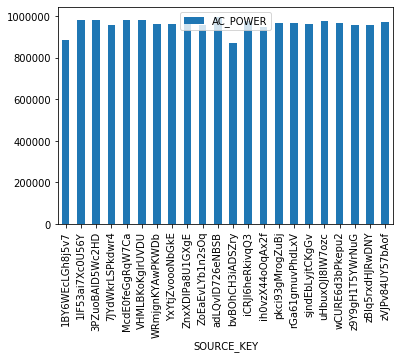

In [7]:
power_data[['SOURCE_KEY','AC_POWER']].groupby(['SOURCE_KEY']).sum().plot(kind='bar')

#### Average daily output

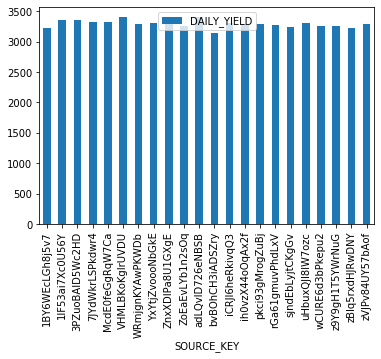

In [8]:
power_data[['SOURCE_KEY','DAILY_YIELD']].groupby(['SOURCE_KEY']).mean().plot(kind='bar')

Power generation is roughly uniform across all power sources except in two.

### Time Series

Set date_time index

In [9]:
power_ts = power_data.set_index('DATE_TIME')
power_ts.head(3)

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0


View typical daily power generation

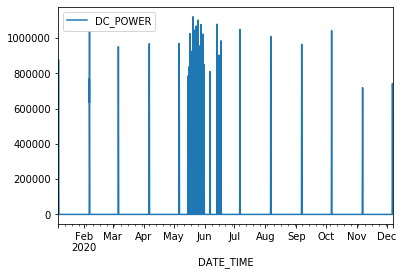

In [31]:
hourly_pow = power_ts[['DC_POWER']].groupby(pd.Grouper(freq='H',origin='start')).sum()
hourly_pow.plot()

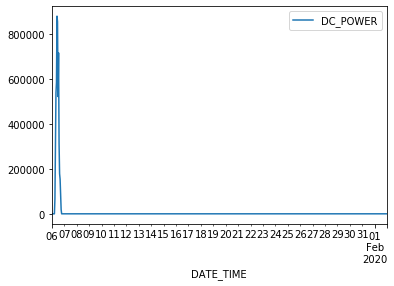

In [27]:
hourly_pow['2020-01-01':'2020-02-01'].plot()

For the most part, data is only available for one day monthly. Thus, for uniformity, we'll only select data for one day of each month.

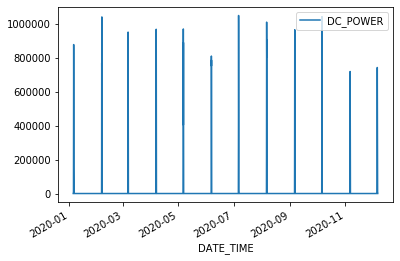

In [28]:
hourly_pow = hourly_pow[hourly_pow.index.day==6]
hourly_pow.plot()

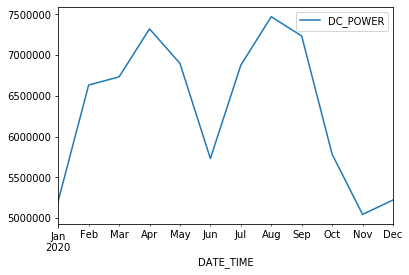

In [29]:
hourly_pow.groupby(pd.Grouper(freq='M',origin='start')).sum().plot()